In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('/home/lin/教材/MearchineLearning/assignmentOneData/CrisisPrediction.csv')

In [3]:
list(data.columns.values)

['year', 'country', 'loans1', 'cpi', 'credit_to_GDP', 'crisisST']

In [4]:
data['logRetCre'] = np.log(data['loans1']/data['cpi']).diff()

In [5]:
data['lag_1'] = data['logRetCre'].shift()
data['lag_2'] = data['logRetCre'].shift(2)
data['lag_3'] = data['logRetCre'].shift(3)
data['lag_4'] = data['logRetCre'].shift(4)
data['lag_5'] = data['logRetCre'].shift(5)
data['credit'] = data['credit_to_GDP'].shift()

data = data.dropna()
preW = data[data['year']<=1938]
postW = data[data['year']>=1948]

In [6]:
data.head(10)

,year,country,loans1,cpi,credit_to_GDP,crisisST,logRetCre,lag_1,lag_2,lag_3,lag_4,lag_5,credit
6,1879,AUS,99.830002,2.750000,0.388142,0,-0.010011,0.066657,0.126886,0.058240,0.081858,0.041862,0.411609
7,1880,AUS,91.010002,2.666667,0.329508,0,-0.061728,-0.010011,0.066657,0.126886,0.058240,0.081858,0.388142
8,1881,AUS,111.970000,2.625000,0.385439,0,0.223010,-0.061728,-0.010011,0.066657,0.126886,0.058240,0.329508
9,1882,AUS,139.880000,2.666667,0.446616,0,0.206805,0.223010,-0.061728,-0.010011,0.066657,0.126886,0.385439
10,1883,AUS,151.120000,2.958333,0.461999,0,-0.026507,0.206805,0.223010,-0.061728,-0.010011,0.066657,0.446616
11,1884,AUS,161.780000,3.000000,0.482493,0,0.054177,-0.026507,0.206805,0.223010,-0.061728,-0.010011,0.461999
12,1885,AUS,178.620000,3.000000,0.520000,0,0.099023,0.054177,-0.026507,0.206805,0.223010,-0.061728,0.482493
13,1886,AUS,185.320010,3.000000,0.517220,0,0.036823,0.099023,0.054177,-0.026507,0.206805,0.223010,0.520000
14,1887,AUS,192.830000,2.916667,0.505717,0,0.067896,0.036823,0.099023,0.054177,-0.026507,0.206805,0.517220
15,1888,AUS,223.950000,2.791667,0.552009,0,0.193416,0.067896,0.036823,0.099023,0.054177,-0.026507,0.505717


1368 0 59 0
auc: 0.6373277827336704
false alarm: nan
missing target: 0.04134548002803083
1368 0 59 0
auc: 0.4518906730102092
false alarm: nan
missing target: 0.04134548002803083
557 0 39 0
auc: 0.6286424526999033
false alarm: nan
missing target: 0.06543624161073826
557 0 39 0
auc: 0.5177922018137459
false alarm: nan
missing target: 0.06543624161073826
811 0 20 0
auc: 0.697533908754624
false alarm: nan
missing target: 0.024067388688327317
811 0 20 0
auc: 0.7200369913686806
false alarm: nan
missing target: 0.024067388688327317


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


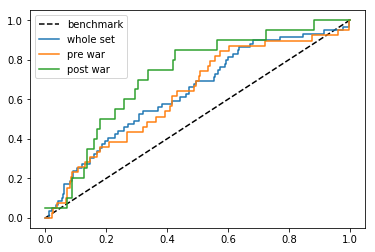

In [8]:
#logistic with whole data set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def in_sample_logistic(training, sign, credit=False):
    if credit is True:
        X = training[['lag_2', 'credit']]
        #X = training[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'credit']]
#from the paper, lag_2 cpi nomalized loan is the most significent one and credit add prediction power, I tried all 
#five lags and it confirmed this results However, the credit seems mostly add power in post war period. Possible
#reason is prewar, credit to GBP is steady thus cannot add much info to predict crisis
    else:
        X = training[['lag_2']]
        #X = training[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]

    y = training['crisisST']
    logis = LogisticRegression()
    logis.fit(X, sign * y)
    pre_pro = logis.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pre_pro)
    auc = roc_auc_score(y, pre_pro)
    
    prediction = logis.predict(X) *sign
    tn, fp, fn, tp = confusion_matrix(y, prediction).ravel()
    print(tn, fp, fn, tp)
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'auc: {auc}')
    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')

    return fpr, tpr, auc

data_fpr, data_tpr, _ = in_sample_logistic(data, -1)
in_sample_logistic(data, -1, True)

pre_fpr, pre_tpr, _ = in_sample_logistic(preW, -1)
in_sample_logistic(preW, -1, True)

in_sample_logistic(postW, 1)
post_fpr, post_tpr, _ = in_sample_logistic(postW, 1, True)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(data_fpr,data_tpr)
plt.plot(pre_fpr,pre_tpr)
plt.plot(post_fpr,post_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])


415 0 14 0
auc: 0.47314974182444064
false alarm: nan
missing target: 0.03263403263403263
415 0 14 0
auc: 0.4165232358003442
false alarm: nan
missing target: 0.03263403263403263
171 0 8 0
auc: 0.5847953216374269
false alarm: nan
missing target: 0.0446927374301676
171 0 8 0
auc: 0.5489766081871346
false alarm: nan
missing target: 0.0446927374301676
244 0 6 0
auc: 0.7021857923497268
false alarm: nan
missing target: 0.024
244 0 6 0
auc: 0.8005464480874317
false alarm: nan
missing target: 0.024


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


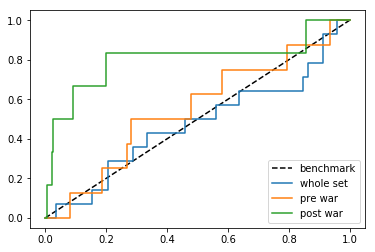

In [9]:
def out_of_sample_logistic(whole, test, sign, credit=False):
    if credit is True:
        #X = whole[['lag_2', 'credit']]
        X = whole[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'credit']]

    else:
        #X = whole[['lag_2']]
        X = whole[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]

    y = whole['crisisST']
    
    trainSize = int(whole.shape[0]*(1-test))
    X_train = X[:trainSize]
    X_test = X[trainSize:]
    y_train = y[:trainSize]
    y_test = y[trainSize:]
    
    logis = LogisticRegression()
    logis.fit(X_train, sign * y_train)
    pre_pro = logis.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, pre_pro)
    auc = roc_auc_score(y_test, pre_pro)
    
    prediction = logis.predict(X_test) * sign
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    print(tn, fp, fn, tp)
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'auc: {auc}')
    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')
    return fpr, tpr, auc
    
whole_fpr, whole_tpr, _ = out_of_sample_logistic(data, 0.3, -1)
out_of_sample_logistic(data, 0.3, -1, True)

out_of_sample_logistic(preW, 0.3, -1)
preW_fpr, preW_tpr, _ = out_of_sample_logistic(preW, 0.3, -1, True)

out_of_sample_logistic(postW, 0.3, 1)
postW_fpr, postW_tpr, _ = out_of_sample_logistic(postW, 0.3, 1, True)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(whole_fpr,whole_tpr)
plt.plot(preW_fpr,preW_tpr)
plt.plot(postW_fpr,postW_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])

415 0 14 0
auc: 0.6932874354561103
false alarm: nan
missing target: 0.03263403263403263
415 0 14 0
auc: 0.44922547332185886
false alarm: nan
missing target: 0.03263403263403263
171 0 8 0
auc: 0.7010233918128654
false alarm: nan
missing target: 0.0446927374301676
171 0 8 0
auc: 0.7309941520467836
false alarm: nan
missing target: 0.0446927374301676
244 0 6 0
auc: 0.6987704918032787
false alarm: nan
missing target: 0.024
244 0 6 0
auc: 0.8169398907103825
false alarm: nan
missing target: 0.024


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


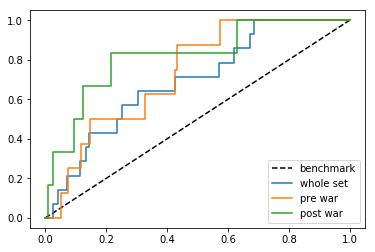

In [10]:
def out_of_sample_logistic(whole, test, sign, credit=False):
    if credit is True:
        X = whole[['lag_2', 'credit']]
    else:
         X = whole[['lag_2']]
    y = whole['crisisST']
    
    trainSize = int(whole.shape[0]*(1-test))
    X_train = X[:trainSize]
    X_test = X[trainSize:]
    y_train = y[:trainSize]
    y_test = y[trainSize:]
    
    logis = LogisticRegression()
    logis.fit(X_train, sign * y_train)
    pre_pro = logis.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, pre_pro)
    auc = roc_auc_score(y_test, pre_pro)
    
    prediction = logis.predict(X_test) * sign
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    print(tn, fp, fn, tp)
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'auc: {auc}')
    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')
    return fpr, tpr, auc
    
whole_fpr, whole_tpr, _ = out_of_sample_logistic(data, 0.3, -1)
out_of_sample_logistic(data, 0.3, -1, True)

out_of_sample_logistic(preW, 0.3, -1)
preW_fpr, preW_tpr, _ = out_of_sample_logistic(preW, 0.3, -1, True)

out_of_sample_logistic(postW, 0.3, 1)
postW_fpr, postW_tpr, _ = out_of_sample_logistic(postW, 0.3, 1, True)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(whole_fpr,whole_tpr)
plt.plot(preW_fpr,preW_tpr)
plt.plot(postW_fpr,postW_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])

In [36]:
total = 0.0
for i in range(2, 6):
    wholeSet = data[:int(data.shape[0]*(i/5.0))]
    _, _, auc = out_of_sample_logistic(wholeSet, (1.0/i), -1)
    total += auc

avg = total/4
avg
#prediction power OK for the whole set to slice into 5 block

270 1 14 0
auc: 0.5875065893516077
false alarm: 1.0
missing target: 0.04929577464788732
270 0 16 0
auc: 0.6863425925925926
false alarm: nan
missing target: 0.055944055944055944
274 0 12 0
auc: 0.6265206812652068
false alarm: nan
missing target: 0.04195804195804196
275 0 11 0
auc: 0.6836363636363636
false alarm: nan
missing target: 0.038461538461538464


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


0.6460015567114427

In [37]:
total = 0.0
for i in range(2, 6):
    wholeSet = postW[:int(postW.shape[0]*(i/5.0))]
    _, _, auc = out_of_sample_logistic(wholeSet, (1.0/i), -1, True)
    total += auc

avg = total/4
avg
#prediction is poor with out without credit for post War only period, but it may or may not be the size of training
#sample, since the first two has the hightest power but those should have the least training sample

162 0 4 0
auc: 0.6404320987654322
false alarm: nan
missing target: 0.024096385542168676
160 0 6 0
auc: 0.7645833333333334
false alarm: nan
missing target: 0.03614457831325301
162 0 4 0
auc: 0.2021604938271605
false alarm: nan
missing target: 0.024096385542168676
162 0 5 0
auc: 0.20246913580246914
false alarm: nan
missing target: 0.029940119760479042


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


0.45241126543209875

In [38]:
total = 0.0
for i in range(2, 6):
    wholeSet = postW[:int(postW.shape[0]*(i/5.0))]
    _, _, auc = out_of_sample_logistic(wholeSet, (1.0/i), -1)
    total += auc

avg = total/4
avg

162 0 4 0
auc: 0.566358024691358
false alarm: nan
missing target: 0.024096385542168676
160 0 6 0
auc: 0.7635416666666667
false alarm: nan
missing target: 0.03614457831325301
162 0 4 0
auc: 0.41358024691358025
false alarm: nan
missing target: 0.024096385542168676
162 0 5 0
auc: 0.2308641975308642
false alarm: nan
missing target: 0.029940119760479042


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


0.49358603395061734

1368 0 56 3
auc: 0.6937568143522649
false alarm: 0.0
missing target: 0.03932584269662921
1368 0 57 2
auc: 0.7598684210526315
false alarm: 0.0
missing target: 0.04
557 0 36 3
auc: 0.7030106338903466
false alarm: 0.0
missing target: 0.06070826306913996
557 0 37 2
auc: 0.7878746029553929
false alarm: 0.0
missing target: 0.06228956228956229
811 0 18 2
auc: 0.780209617755857
false alarm: 0.0
missing target: 0.021712907117008445
811 0 18 2
auc: 0.8358199753390876
false alarm: 0.0
missing target: 0.021712907117008445


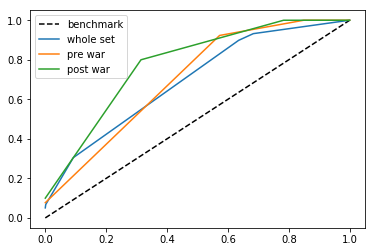

In [39]:
from sklearn import tree
import graphviz 
#criterion=”gini”)
#“entropy” for the information gain
#entropy is nuts

def in_sample_tree(training, maxD = 3, credit=False):
    if credit is True:
        X = training[['lag_2', 'credit']]

    else:
         X = training[['lag_2']]
    y = training['crisisST']
    treeClas = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxD)
    treeClas.fit(X, y)
    pre_pro = treeClas.predict_proba(X)[:, 1]
    fpr, tpr, thr = roc_curve(y, pre_pro, drop_intermediate=False)
    auc = roc_auc_score(y, pre_pro)
    prediction = treeClas.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, prediction).ravel()
    print(tn, fp, fn, tp)
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'auc: {auc}')
    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')
    
    return fpr, tpr, auc

data_fpr, data_tpr, _ = in_sample_tree(data)
in_sample_tree(data, credit=True)

pre_fpr, pre_tpr, _ = in_sample_tree(preW)
in_sample_tree(preW, credit=True)

post_fpr, post_tpr, _ = in_sample_tree(postW)
in_sample_tree(postW, credit=True)
#by changing maxD, all of these have the protetial to get auc to 1.0

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(data_fpr,data_tpr)
plt.plot(pre_fpr,pre_tpr)
plt.plot(post_fpr,post_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])
#picture looks like this is because of the number of threshold
#np.unique(pre_pro).shape == thr.shape == fpr.shape == tpr.shape

#This part really cannot do much compare, since tree has the protential to get 1.0 auc. So this is just a demostration

In [42]:
def out_of_sample_tree(whole, test, maxD = 3, credit=False, pri=False, criterion='gini'):
    if credit is True:
        X = whole[['lag_2', 'credit']]
    else:
         X = whole[['lag_2']]
    y = whole['crisisST']
    
    trainSize = int(whole.shape[0]*(1-test))
    X_train = X[:trainSize]
    X_test = X[trainSize:]
    y_train = y[:trainSize]
    y_test = y[trainSize:]
    if criterion=='gini':
        treeClas = tree.DecisionTreeClassifier(criterion='gini', max_depth=maxD)
    elif criterion=='entropy':
        treeClas = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxD)
    treeClas.fit(X_train, y_train)
    pre_pro = treeClas.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, pre_pro)
    auc = roc_auc_score(y_test, pre_pro)
    
    prediction = treeClas.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    print(tn, fp, fn, tp)
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')

    if pri:
        print(f'auc: {auc}')
    return fpr, tpr, auc

#out of sample can compare gini and entropy

681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
403 0 13 0
false alarm: nan
missing target: 0.03125
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
142 0 7 0
false alarm: nan
missing target: 0.0469798

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
678 4 32 0
false alarm: 1.0
missing target: 0.04507042253521127
681 1 31 1
false alarm: 0.5
missing target: 0.04353932584269663
275 4 19 0
false alarm: 1.0
missing target: 0.06462585034013606
275 4 19 0
false alarm: 1.0
missing target: 0.06462585034013606
400 3 13 0
false alarm: 1.0
missing target

178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211
175 11 12 1
false alarm: 0.9166666666666666
missing target: 0.06417112299465241
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
267 3 7 0
false alarm: 1.0
missing target: 0.025547445255474453
342 2 12 1
false alarm: 0.6666666666666666
missing target: 0.03389830508474576
340 4 12 1
false alarm: 0.8
missing target: 0.03409090909090909
134 8 7 0
false alarm: 1.0
missing target: 0.04964539007092199
130 12 6 1
false alarm: 0.9230769230769231
missing target: 0.04411764705882353
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
274 1 10 1
false alarm: 0.5
missing target: 0.035211267605633804
270 5 11 0
false alarm: 1.0
missing target: 0.03914590747330961
107 6 7 0
false alarm: 1.0
missing target: 0.06140350877192982
104 9 7 0
false alarm: 1.0
missing target: 0.06306306306306306
158 4 5 0
false alarm: 1.0
missing target: 0.0

268 7 11 0
false alarm: 1.0
missing target: 0.03942652329749104
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
106 7 7 0
false alarm: 1.0
missing target: 0.061946902654867256
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
666 16 29 3
false alarm: 0.8421052631578947
missing target: 0.041726618705035974
663 19 29 3
false alarm: 0.8636363636363636
missing target: 0.04190751445086705
258 21 17 2
false alarm: 0.9130434782608695
missing target: 0.06181818181818182
264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
397 6 13 0
false alarm: 1.0
missing target: 0.03170731707317073
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
446 15 13 2
false alarm: 0.8823529411764706
missing target: 0.02832244008714597
176 10 12 1
false alarm: 0.9090909090909091
missing target: 0.063829787

267 3 7 0
false alarm: 1.0
missing target: 0.025547445255474453
337 7 10 3
false alarm: 0.7
missing target: 0.02881844380403458
332 12 11 2
false alarm: 0.8571428571428571
missing target: 0.03206997084548105
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928
125 17 6 1
false alarm: 0.9444444444444444
missing target: 0.04580152671755725
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
269 6 8 3
false alarm: 0.6666666666666666
missing target: 0.02888086642599278
267 8 11 0
false alarm: 1.0
missing target: 0.039568345323741004
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
104 9 7 0
false alarm: 1.0
missing target: 0.06306306306306306
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
666 16 29 3
false alarm: 0.8421052631578947
missing target: 0.041726618705035974
664 18 29 3
false alarm: 0.8571428571428571
m

264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
397 6 13 0
false alarm: 1.0
missing target: 0.03170731707317073
449 12 11 4
false alarm: 0.75
missing target: 0.02391304347826087
444 17 13 2
false alarm: 0.8947368421052632
missing target: 0.028446389496717725
176 10 12 1
false alarm: 0.9090909090909091
missing target: 0.06382978723404255
172 14 12 1
false alarm: 0.9333333333333333
missing target: 0.06521739130434782
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
268 2 7 0
false alarm: 1.0
missing target: 0.025454545454545455
336 8 10 3
false alarm: 0.7272727272727273
missing target: 0.028901734104046242
332 12 11 2
false alarm: 0.8571428571428571
missing target: 0.03206997084548105
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928
126 16 6 1
false alarm: 0.9411764705882353
missing target: 0.045454545454545456
197 5 6 0
false alarm: 1.0
missing target: 0.02955665

666 16 29 3
false alarm: 0.8421052631578947
missing target: 0.041726618705035974
666 16 29 3
false alarm: 0.8421052631578947
missing target: 0.041726618705035974
258 21 17 2
false alarm: 0.9130434782608695
missing target: 0.06181818181818182
264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
397 6 13 0
false alarm: 1.0
missing target: 0.03170731707317073
448 13 11 4
false alarm: 0.7647058823529411
missing target: 0.023965141612200435
443 18 13 2
false alarm: 0.9
missing target: 0.02850877192982456
176 10 12 1
false alarm: 0.9090909090909091
missing target: 0.06382978723404255
170 16 12 1
false alarm: 0.9411764705882353
missing target: 0.06593406593406594
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
268 2 7 0
false alarm: 1.0
missing target: 0.025454545454545455
335 9 10 3
false alarm: 0.75
missing target: 0.028985507246376812
332 12 11 2
false alarm: 0.8571428571428571
missi

399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
397 6 13 0
false alarm: 1.0
missing target: 0.03170731707317073
448 13 11 4
false alarm: 0.7647058823529411
missing target: 0.023965141612200435
443 18 13 2
false alarm: 0.9
missing target: 0.02850877192982456
176 10 12 1
false alarm: 0.9090909090909091
missing target: 0.06382978723404255
173 13 12 1
false alarm: 0.9285714285714286
missing target: 0.06486486486486487
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
267 3 7 0
false alarm: 1.0
missing target: 0.025547445255474453
335 9 10 3
false alarm: 0.75
missing target: 0.028985507246376812
332 12 11 2
false alarm: 0.8571428571428571
missing target: 0.03206997084548105
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928
125 17 7 0
false alarm: 1.0
missing target: 0.05303030303030303
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
268 7 8 3
false alarm: 0.7
missing tar

173 13 12 1
false alarm: 0.9285714285714286
missing target: 0.06486486486486487
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
268 2 7 0
false alarm: 1.0
missing target: 0.025454545454545455
335 9 10 3
false alarm: 0.75
missing target: 0.028985507246376812
331 13 11 2
false alarm: 0.8666666666666667
missing target: 0.03216374269005848
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928
126 16 6 1
false alarm: 0.9411764705882353
missing target: 0.045454545454545456
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
268 7 8 3
false alarm: 0.7
missing target: 0.028985507246376812
268 7 11 0
false alarm: 1.0
missing target: 0.03942652329749104
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
104 9 7 0
false alarm: 1.0
missing target: 0.06306306306306306
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687
159 3 5 0
false alarm: 1.0
missing target: 0.030487804878

126 16 6 1
false alarm: 0.9411764705882353
missing target: 0.045454545454545456
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
268 7 8 3
false alarm: 0.7
missing target: 0.028985507246376812
269 6 11 0
false alarm: 1.0
missing target: 0.039285714285714285
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
106 7 7 0
false alarm: 1.0
missing target: 0.061946902654867256
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
666 16 29 3
false alarm: 0.8421052631578947
missing target: 0.041726618705035974
664 18 29 3
false alarm: 0.8571428571428571
missing target: 0.04184704184704185
258 21 17 2
false alarm: 0.9130434782608695
missing target: 0.06181818181818182
264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
397 6 13 0
false alarm:

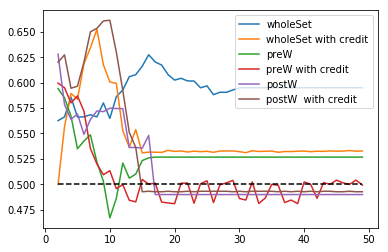

In [43]:
#basically cross validation to get optimal depth
realDeap = 50
testOF = pd.DataFrame(index=range(2, realDeap), columns=['wholeSet', 'wholeSet with credit', 'preW', 'preW with credit', 'postW', 'postW  with credit'])
for maxDeepth in range(2, realDeap):
    totalW = 0.0
    totalWC = 0.0
    totalPre = 0.0
    totalPreC = 0.0
    totalPos = 0.0
    totalPosC = 0.0
    for i in range(2, 6):
        _, _, auc = out_of_sample_tree(data, (1.0/i), maxDeepth)
        totalW += auc
        _, _, auc = out_of_sample_tree(data, (1.0/i), maxDeepth,  True)
        totalWC += auc

        _, _, auc = out_of_sample_tree(preW, (1.0/i), maxDeepth)
        totalPre += auc
        _, _, auc = out_of_sample_tree(preW, (1.0/i), maxDeepth, True)
        totalPreC += auc

        _, _, auc = out_of_sample_tree(postW, (1.0/i), maxDeepth)
        totalPos += auc

        _, _, auc = out_of_sample_tree(postW, (1.0/i), maxDeepth, True)
        totalPosC += auc

    testOF['wholeSet'][maxDeepth] = totalW/4
    testOF['wholeSet with credit'][maxDeepth] = totalWC/4
    testOF['preW'][maxDeepth] = totalPre/4
    testOF['preW with credit'][maxDeepth] = totalPreC/4

    testOF['postW'][maxDeepth] = totalPos/4
    testOF['postW  with credit'][maxDeepth]= totalPosC/4
                
plt.plot(range(2, realDeap), testOF)
plt.plot(range(2, realDeap), np.ones(realDeap - 2)*0.5, 'k--')
plt.legend(['wholeSet', 'wholeSet with credit', 'preW', 'preW with credit', 'postW', 'postW  with credit'])
    


In [44]:
import math
got = {}
for index, row in testOF[testOF==testOF.max(axis=0)].iterrows():
    for key in row.keys():
        if not math.isnan(row[key]):
            got[key] = index
got
    

{'postW': 2,
 'postW  with credit': 10,
 'preW': 2,
 'preW with credit': 2,
 'wholeSet': 16,
 'wholeSet with credit': 8}

407 8 14 0
false alarm: 1.0
missing target: 0.0332541567695962
auc: 0.6713425129087779
170 1 8 0
false alarm: 1.0
missing target: 0.0449438202247191
auc: 0.5804093567251463
241 3 6 0
false alarm: 1.0
missing target: 0.024291497975708502
auc: 0.7161885245901639


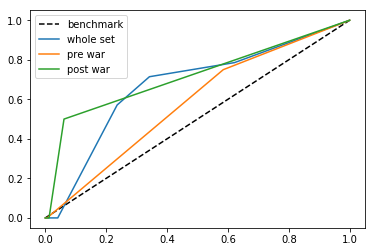

In [45]:
#out of sample test, gini outperform entropy, can quickly run entropy when writing report
data_fpr, data_tpr, _ = out_of_sample_tree(data, 0.3, 8,  True, True)
preW_fpr, preW_tpr, _ = out_of_sample_tree(preW, 0.3, 2, pri=True)
postW_fpr, postW_tpr, _ = out_of_sample_tree(postW, 0.3, 9, True, True)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(data_fpr,data_tpr)
plt.plot(preW_fpr,preW_tpr)
plt.plot(postW_fpr,postW_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])

In [46]:
print("maxD = 5")
whole_fpr, whole_tpr, _ = out_of_sample_tree(data, 0.3, 5, pri=True)
out_of_sample_tree(data, 0.3, 5,  True, True)
#this data set dont like credit

out_of_sample_tree(preW, 0.3, 5, pri=True)
preW_fpr, preW_tpr, _ = out_of_sample_tree(preW, 0.3, 5, True, True)

out_of_sample_tree(postW, 0.3, 5, pri=True)
postW_fpr, postW_tpr, _ = out_of_sample_tree(postW, 0.3, 5, True, True)
#seems this one is still not overfitting

print("maxD = 2")
out_of_sample_tree(data, 0.3, 2, pri=True)
out_of_sample_tree(data, 0.3, 2,  True, True)
#credit got selected in this one, but end up with worse out of sample predicting power
out_of_sample_tree(preW, 0.3, 2, pri=True)
out_of_sample_tree(preW, 0.3, 2, True, True)
#the output are the same which means within first 2 split, credit didn't get selected

out_of_sample_tree(postW, 0.3, 2, pri=True)
out_of_sample_tree(postW, 0.3, 2, True, True)
#post war always goes well with credit

maxD = 5
414 1 13 1
false alarm: 0.5
missing target: 0.03044496487119438
auc: 0.5981067125645438
415 0 14 0
false alarm: nan
missing target: 0.03263403263403263
auc: 0.5781411359724612
169 2 8 0
false alarm: 1.0
missing target: 0.04519774011299435
auc: 0.5190058479532164
170 1 8 0
false alarm: 1.0
missing target: 0.0449438202247191
auc: 0.6008771929824561
242 2 6 0
false alarm: 1.0
missing target: 0.024193548387096774
auc: 0.6075819672131146
242 2 6 0
false alarm: 1.0
missing target: 0.024193548387096774
auc: 0.6844262295081966
maxD = 2
414 1 14 0
false alarm: 1.0
missing target: 0.03271028037383177
auc: 0.5810671256454389
415 0 14 0
false alarm: nan
missing target: 0.03263403263403263
auc: 0.5012048192771084
170 1 8 0
false alarm: 1.0
missing target: 0.0449438202247191
auc: 0.5804093567251463
171 0 8 0
false alarm: nan
missing target: 0.0446927374301676
auc: 0.5862573099415205
243 1 6 0
false alarm: 1.0
missing target: 0.024096385542168676
auc: 0.6178278688524591
244 0 6 0
false alarm

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


(array([0.  , 0.25, 1.  ]), array([0. , 0.5, 1. ]), 0.625)

811 0 15 5
auc: 0.9096485819975338
false alarm: 0.0
missing target: 0.018159806295399514


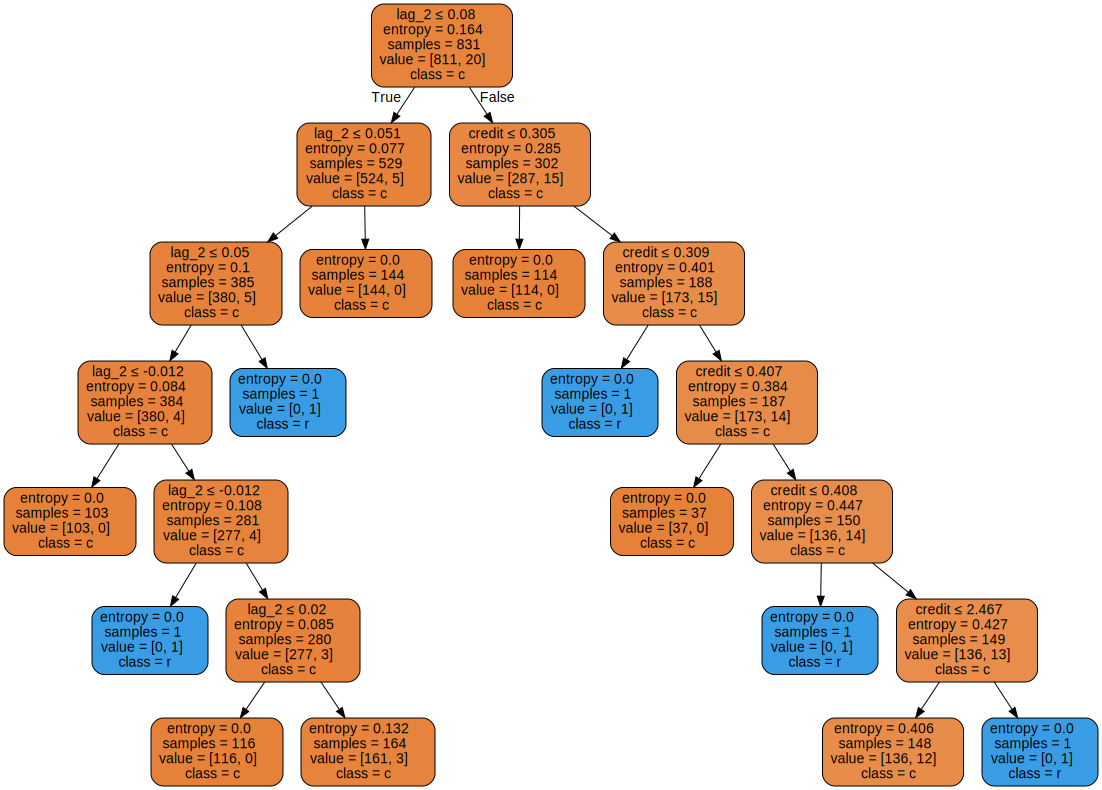

In [47]:

def in_sample_treePlot(training, maxD = 6, credit=False):
    if credit is True:
        X = training[['lag_2', 'credit']]

    else:
         X = training[['lag_2']]
    y = training['crisisST']
    treeClas = tree.DecisionTreeClassifier(criterion='entropy', max_depth=maxD)
    treeClas.fit(X, y)
    pre_pro = treeClas.predict_proba(X)[:, 1]
    fpr, tpr, thr = roc_curve(y, pre_pro, drop_intermediate=False)
    auc = roc_auc_score(y, pre_pro)
    dot_data = tree.export_graphviz(treeClas, out_file=None, 
                         feature_names=['lag_2', 'credit'],  
                         class_names='crisis',  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data)
    
    prediction = treeClas.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, prediction).ravel()
    print(tn, fp, fn, tp)
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'auc: {auc}')
    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')
    return graph

in_sample_treePlot(postW, credit=True)


#in_sample_treePlot(postW, True).render(filename='/home/lin/test')


1368 0 57 2
auc: 0.7608534046981861
false alarm: 0.0
missing target: 0.04
1368 0 57 2
auc: 0.7806955595202695
false alarm: 0.0
missing target: 0.04
557 0 37 2
auc: 0.7686783593426323
false alarm: 0.0
missing target: 0.06228956228956229
557 0 38 1
auc: 0.8619895962804401
false alarm: 0.0
missing target: 0.06386554621848739
811 0 19 1
auc: 0.9312268803945746
false alarm: 0.0
missing target: 0.02289156626506024
811 0 19 1
auc: 0.9594944512946979
false alarm: 0.0
missing target: 0.02289156626506024


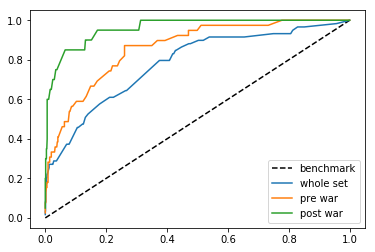

In [48]:
from sklearn.ensemble import RandomForestClassifier
def in_sample_forest(training, maxD = 3, credit=False):
    if credit is True:
        X = training[['lag_2', 'credit']]

    else:
         X = training[['lag_2']]
    y = training['crisisST']
    foreClas = RandomForestClassifier(criterion='gini', max_depth=maxD)
    foreClas.fit(X, y)
    pre_pro = foreClas.predict_proba(X)[:, 1]
    fpr, tpr, thr = roc_curve(y, pre_pro, drop_intermediate=False)
    auc = roc_auc_score(y, pre_pro)
    
    prediction = foreClas.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, prediction).ravel()
    print(tn, fp, fn, tp)
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'auc: {auc}')
    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')
    
    return fpr, tpr, auc

in_sample_forest(data)
data_fpr, data_tpr, _ = in_sample_forest(data, credit=True)

in_sample_forest(preW)
pre_fpr, pre_tpr, _ = in_sample_forest(preW, credit=True)

in_sample_forest(postW)
post_fpr, post_tpr, _ = in_sample_forest(postW, credit=True)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(data_fpr,data_tpr)
plt.plot(pre_fpr,pre_tpr)
plt.plot(post_fpr,post_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])
#with default depth 3, greatly out perform tree

In [49]:
def out_of_sample_forest(whole, test, maxD = 3, credit=False, pri=False, criterion='gini'):
    if credit is True:
        X = whole[['lag_2', 'credit']]
    else:
         X = whole[['lag_2']]
    y = whole['crisisST']
    
    trainSize = int(whole.shape[0]*(1-test))
    X_train = X[:trainSize]
    X_test = X[trainSize:]
    y_train = y[:trainSize]
    y_test = y[trainSize:]
    if criterion=='gini':
        foreClas = RandomForestClassifier(criterion='gini', max_depth=maxD)
    elif criterion=='entropy':
        foreClas = RandomForestClassifier(criterion='entropy', max_depth=maxD)
    foreClas.fit(X_train, y_train)
    pre_pro = foreClas.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, pre_pro)
    auc = roc_auc_score(y_test, pre_pro)

    prediction = foreClas.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    print(tn, fp, fn, tp)

    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')

    if pri:
        print(f'auc: {auc}')
    return fpr, tpr, auc

#out of sample can compare gini and entropy

682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
403 0 13 0
false alarm: nan
missing target: 0.03125
403 0 13 0
false alarm: nan
missing target: 0.03125
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide

270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide

113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
679 3 32 0
false alarm: 1.0
missing target: 0.0450070323488045
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


403 0 13 0
false alarm: nan
missing target: 0.03125
403 0 13 0
false alarm: nan
missing target: 0.03125
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
110 3 7 0
false alarm: 1.0
missing target: 0.05982905982905983


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
680 2 32 0
false alarm: 1.0
missing target: 0.0449438202247191
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
277 2 19 0
false alarm: 1.0
missing target: 0.06418918918918919
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
400 3 13 0
false alarm: 1.0
missing target: 0.031476997578692496
403 0 13 0
false alarm: nan
missing target: 0.03125


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
676 6 32 0
false alarm: 1.0
missing target: 0.04519774011299435


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide

682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
275 4 19 0
false alarm: 1.0
missing target: 0.06462585034013606
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
400 3 13 0
false alarm: 1.0
missing target: 0.031476997578692496
403 0 13 0
false alarm: nan
missing target: 0.03125


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


459 2 14 1
false alarm: 0.6666666666666666
missing target: 0.02959830866807611
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
138 4 7 0
false alarm: 1.0
missing target: 0.04827586206896552
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
675 7 31 1
false alarm: 0.875
missing target: 0.043909348441926344
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
274 5 19 0
false alarm: 1.0
missing target: 0.06484641638225255
277 2 18 1
false alarm: 0.6666666666666666
missing target: 0.061016949152542375
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
403 0 13 0
false alarm: nan
missing target: 0.03125


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
268 2 7 0
false alarm: 1.0
missing target: 0.025454545454545455
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


671 11 32 0
false alarm: 1.0
missing target: 0.04551920341394026
680 2 32 0
false alarm: 1.0
missing target: 0.0449438202247191
271 8 19 0
false alarm: 1.0
missing target: 0.06551724137931035
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
400 3 13 0
false alarm: 1.0
missing target: 0.031476997578692496
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
458 3 14 1
false alarm: 0.75
missing target: 0.029661016949152543
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
182 4 13 0
false alarm: 1.0
missing target: 0.06666666666666667


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
138 4 7 0
false alarm: 1.0
missing target: 0.04827586206896552
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
274 1 10 1
false alarm: 0.5
missing target: 0.035211267605633804


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
669 13 29 3
false alarm: 0.8125
missing target: 0.04154727793696275
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
263 16 17 2
false alarm: 0.8888888888888888
missing target: 0.060714285714285714
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
403 0 13 0
false alarm: nan
missing target: 0.03125
458 3 15 0
false alarm: 1.0
missing target: 0.03171247357293869
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
180 6 12 1
false alarm: 0.8571428571428571
missing target: 0.0625
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
266 4 7 0
false alarm: 1.0


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
136 6 7 0
false alarm: 1.0
missing target: 0.04895104895104895
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
200 2 6 0
false alarm: 1.0
missing target: 0.02912621359223301
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
109 4 6 1
false alarm: 0.8
missing target: 0.05217391304347826


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
671 11 31 1
false alarm: 0.9166666666666666
missing target: 0.04415954415954416
680 2 31 1
false alarm: 0.6666666666666666
missing target: 0.04360056258790436
264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
403 0 13 0
false alarm: nan
missing target: 0.03125
456 5 13 2
false alarm: 0.7142857142857143
missing target: 0.02771855010660981
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing targ

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
136 6 6 1
false alarm: 0.8571428571428571
missing target: 0.04225352112676056
138 4 7 0
false alarm: 1.0
missing target: 0.04827586206896552
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
274 1 10 1
false alarm: 0.5
missing target: 0.035211267605633804


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


673 9 30 2
false alarm: 0.8181818181818182
missing target: 0.04267425320056899
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
270 9 19 0
false alarm: 1.0
missing target: 0.0657439446366782
276 3 18 1
false alarm: 0.75
missing target: 0.061224489795918366
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
455 6 14 1
false alarm: 0.8571428571428571
missing target: 0.029850746268656716
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
180 6 12 1
false alarm: 0.8571428571428571
missing target: 0.0625


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


177 9 13 0
false alarm: 1.0
missing target: 0.06842105263157895
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
342 2 12 1
false alarm: 0.6666666666666666
missing target: 0.03389830508474576
342 2 13 0
false alarm: 1.0
missing target: 0.036619718309859155
136 6 6 1
false alarm: 0.8571428571428571
missing target: 0.04225352112676056
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
272 3 10 1
false alarm: 0.75
missing target: 0.03546099290780142
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
663 19 30 2
false alarm: 0.9047619047619048
missing target: 0.04329004329004329
679 3 32 0
false alarm: 1.0
missing target: 0.0450070323488045
264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
403 0 13 0
false alarm: nan
missing target: 0.03125
458 3 14 1
false alarm: 0.75
missing target: 0.029661016949152543
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
339 5 10 3
false alarm: 0.625
missing target: 0.02865329512893983
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
135 7 7 0
false alarm: 1.0
missing target: 0.04929577464788732
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
200 2 6 0
false alarm: 1.0
missing target: 0.02912621359223301


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
273 2 9 2
false alarm: 0.5
missing target: 0.031914893617021274
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 7 0
false alarm: 1.0
missing target: 0.06140350877192982
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
667 15 29 3
false alarm: 0.8333333333333334
missing target: 0.041666666666666664
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
262 17 18 1
false alarm: 0.9444444444444444
missing target: 0.06428571428571428
276 3 19 0
false alarm: 1.0
missing target: 0.06440677966101695
400 3 13 0
false alarm: 1.0
missing target: 0.031476997578692496
403 0 13 0
false alarm: nan
missing target: 0.03125
452 9 12 3
false alarm: 0.75
missing target: 0.02586206896551724
458 3 15 0
false alarm: 1.0
missing target: 0.03171247357293869


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


175 11 12 1
false alarm: 0.9166666666666666
missing target: 0.06417112299465241
182 4 13 0
false alarm: 1.0
missing target: 0.06666666666666667
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
342 2 12 1
false alarm: 0.6666666666666666
missing target: 0.03389830508474576
341 3 13 0
false alarm: 1.0
missing target: 0.03672316384180791
134 8 7 0
false alarm: 1.0
missing target: 0.04964539007092199
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
267 8 8 3
false alarm: 0.7272727272727273
missing target: 0.02909090909090909
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
673 9 30 2
false alarm: 0.8181818181818182
missing target: 0.04267425320056899
678 4 32 0
false alarm: 1.0
missing target: 0.04507042253521127
259 20 17 2
false alarm: 0.9090909090909091
missing target: 0.06159420289855073
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
454 7 11 4
false alarm: 0.6363636363636364
missing target: 0.023655913978494623
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
177 9 12 1
false alarm: 0.9
missing target: 0.06349206349206349
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
341 3 11 2
false alarm: 0.6
missing target: 0.03125
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
270 5 9 2
false alarm: 0.7142857142857143
missing target: 0.03225806451612903
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
669 13 30 2
false alarm: 0.8666666666666667
missing target: 0.04291845493562232
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


263 16 17 2
false alarm: 0.8888888888888888
missing target: 0.060714285714285714
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
177 9 12 1
false alarm: 0.9
missing target: 0.06349206349206349
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 11 2
false alarm: 0.7777777777777778
missing target: 0.031609195402298854


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
135 7 6 1
false alarm: 0.875
missing target: 0.0425531914893617
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
270 5 8 3
false alarm: 0.625
missing target: 0.02877697841726619
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
108 5 7 0
false alarm: 1.0
missing target: 0.06086956521739131


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


110 3 7 0
false alarm: 1.0
missing target: 0.05982905982905983
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
672 10 30 2
false alarm: 0.8333333333333334
missing target: 0.042735042735042736
678 4 32 0
false alarm: 1.0
missing target: 0.04507042253521127
259 20 17 2
false alarm: 0.9090909090909091
missing target: 0.06159420289855073
277 2 19 0
false alarm: 1.0
missing target: 0.06418918918918919
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
449 12 12 3
false alarm: 0.8
missing target: 0.026030368763557483


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
175 11 13 0
false alarm: 1.0
missing target: 0.06914893617021277
181 5 13 0
false alarm: 1.0
missing target: 0.06701030927835051
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 10 3
false alarm: 0.7
missing target: 0.02881844380403458
341 3 13 0
false alarm: 1.0
missing target: 0.03672316384180791
137 5 7 0
false alarm: 1.0
missing target: 0.04861111111111111
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
270 5 9 2
false alarm: 0.7142857142857143
missing target: 0.03225806451612903
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
109 4 6 1
false alarm: 0.8
missing target: 0.05217391304347826
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
160 2 5 0
false alarm: 1.0
mi

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


276 3 19 0
false alarm: 1.0
missing target: 0.06440677966101695
400 3 13 0
false alarm: 1.0
missing target: 0.031476997578692496
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
454 7 11 4
false alarm: 0.6363636363636364
missing target: 0.023655913978494623
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
180 6 12 1
false alarm: 0.8571428571428571
missing target: 0.0625
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
336 8 10 3
false alarm: 0.7272727272727273
missing target: 0.028901734104046242


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


340 4 13 0
false alarm: 1.0
missing target: 0.036827195467422094
135 7 7 0
false alarm: 1.0
missing target: 0.04929577464788732
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
200 2 6 0
false alarm: 1.0
missing target: 0.02912621359223301
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
272 3 8 3
false alarm: 0.5
missing target: 0.02857142857142857
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
669 13 30 2
false alarm: 0.8666666666666667
missing target: 0.04291845493562232
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


267 12 18 1
false alarm: 0.9230769230769231
missing target: 0.06315789473684211
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
459 2 15 0
false alarm: 1.0
missing target: 0.03164556962025317
182 4 11 2
false alarm: 0.6666666666666666
missing target: 0.05699481865284974
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
267 3 7 0
false alarm: 1.0
missing target: 0.025547445255474453
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


336 8 11 2
false alarm: 0.8
missing target: 0.03170028818443804
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
137 5 7 0
false alarm: 1.0
missing target: 0.04861111111111111
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 8 3
false alarm: 0.6666666666666666
missing target: 0.02888086642599278
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
671 11 29 3
false alarm: 0.7857142857142857
missing target: 0.041428571428571426
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 11 4
false alarm: 0.7142857142857143
missing target: 0.023809523809523808
460 1 14 1
false alarm: 0.5
missing target: 0.029535864978902954
179 7 13 0
false alarm: 1.0
missing target: 0.06770833333333333
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
267 3 7 0
false alarm: 1.0
missing target: 0.025547445255474453
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


337 7 10 3
false alarm: 0.7
missing target: 0.02881844380403458
340 4 13 0
false alarm: 1.0
missing target: 0.036827195467422094
138 4 7 0
false alarm: 1.0
missing target: 0.04827586206896552
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


270 5 9 2
false alarm: 0.7142857142857143
missing target: 0.03225806451612903
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
672 10 30 2
false alarm: 0.8333333333333334
missing target: 0.042735042735042736


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


677 5 32 0
false alarm: 1.0
missing target: 0.045133991537376586
260 19 17 2
false alarm: 0.9047619047619048
missing target: 0.061371841155234655
277 2 19 0
false alarm: 1.0
missing target: 0.06418918918918919
403 0 13 0
false alarm: nan
missing target: 0.03125
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
177 9 13 0
false alarm: 1.0
missing target: 0.06842105263157895
183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
335 9 10 3
false alarm: 0.75
missing target: 0.028985507246376812
342 2 13 0
false alarm: 1.0
missing target: 0.036619718309859155
136 6 7 0
false alarm: 1.0
missing target: 0.04895104895104895
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 10 1
false alarm: 0.8571428571428571
missing target: 0.035842293906810034
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
108 5 7 0
false alarm: 1.0
missing target: 0.06086956521739131


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
671 11 30 2
false alarm: 0.8461538461538461
missing target: 0.042796005706134094
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395
277 2 18 1
false alarm: 0.6666666666666666
missing target: 0.061016949152542375
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
459 2 15 0
false alarm: 1.0
missing target: 0.03164556962025317
180 6 12 1
false alarm: 0.8571428571428571
missing target: 0.0625
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


336 8 11 2
false alarm: 0.8
missing target: 0.03170028818443804
343 1 12 1
false alarm: 0.5
missing target: 0.03380281690140845
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
268 7 8 3
false alarm: 0.7
missing target: 0.028985507246376812
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
108 5 6 1
false alarm: 0.8333333333333334
missing target: 0.05263157894736842


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
673 9 31 1
false alarm: 0.9
missing target: 0.04403409090909091
680 2 32 0
false alarm: 1.0
missing target: 0.0449438202247191
262 17 17 2
false alarm: 0.8947368421052632
missing target: 0.06093189964157706
278 1 18 1
false alarm: 0.5
missing target: 0.060810810810810814
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
453 8 13 2
false alarm: 0.8
missing target: 0.027896995708154508


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
340 4 12 1
false alarm: 0.8
missing target: 0.03409090909090909
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
268 7 9 2
false alarm: 0.7777777777777778
missing target: 0.032490974729241874


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 7 0
false alarm: 1.0
missing target: 0.06140350877192982
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
671 11 29 3
false alarm: 0.7857142857142857
missing target: 0.041428571428571426


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
262 17 17 2
false alarm: 0.8947368421052632
missing target: 0.06093189964157706
277 2 18 1
false alarm: 0.6666666666666666
missing target: 0.061016949152542375
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
452 9 13 2
false alarm: 0.8181818181818182
missing target: 0.02795698924731183


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
179 7 12 1
false alarm: 0.875
missing target: 0.06282722513089005
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
267 3 7 0
false alarm: 1.0
missing target: 0.025547445255474453
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
338 6 10 3
false alarm: 0.6666666666666666
missing target: 0.028735632183908046


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
136 6 7 0
false alarm: 1.0
missing target: 0.04895104895104895
138 4 7 0
false alarm: 1.0
missing target: 0.04827586206896552
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
273 2 9 2
false alarm: 0.5
missing target: 0.031914893617021274
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
108 5 6 1
false alarm: 0.8333333333333334
missing target: 0.05263157894736842


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
667 15 29 3
false alarm: 0.8333333333333334
missing target: 0.041666666666666664
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
264 15 18 1
false alarm: 0.9375
missing target: 0.06382978723404255
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
453 8 13 2
false alarm: 0.8
missing target: 0.027896995708154508
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
177 9 12 1
false alarm: 0.9
missing target: 0.06349206349206349
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


337 7 11 2
false alarm: 0.7777777777777778
missing target: 0.031609195402298854
342 2 13 0
false alarm: 1.0
missing target: 0.036619718309859155
135 7 6 1
false alarm: 0.875
missing target: 0.0425531914893617
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
271 4 10 1
false alarm: 0.8
missing target: 0.03558718861209965


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
108 5 7 0
false alarm: 1.0
missing target: 0.06086956521739131
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
668 14 29 3
false alarm: 0.8235294117647058
missing target: 0.04160688665710186
676 6 32 0
false alarm: 1.0
missing target: 0.04519774011299435


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


265 14 18 1
false alarm: 0.9333333333333333
missing target: 0.0636042402826855
277 2 18 1
false alarm: 0.6666666666666666
missing target: 0.061016949152542375
403 0 13 0
false alarm: nan
missing target: 0.03125
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
450 11 11 4
false alarm: 0.7333333333333333
missing target: 0.02386117136659436
456 5 15 0
false alarm: 1.0
missing target: 0.03184713375796178
179 7 13 0
false alarm: 1.0
missing target: 0.06770833333333333
183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 12 1
false alarm: 0.875
missing target: 0.034383954154727794
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
272 3 9 2
false alarm: 0.6
missing target: 0.03202846975088968
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
669 13 29 3
false alarm: 0.8125
missing target: 0.04154727793696275
680 2 32 0
false alarm: 1.0
missing target: 0.0449438202247191
262 17 18 1
false alarm: 0.9444444444444444
missing target: 0.06428571428571428
277 2 19 0
false alarm: 1.0
missing target: 0.06418918918918919
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
451 10 13 2
false alarm: 0.8333333333333334
missing target: 0.028017241379310345
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
341 3 11 2
false alarm: 0.6
missing target: 0.03125
342 2 13 0
false alarm: 1.0
missing target: 0.036619718309859155
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


270 5 9 2
false alarm: 0.7142857142857143
missing target: 0.03225806451612903
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
109 4 7 0
false alarm: 1.0
missing target: 0.0603448275862069
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
667 15 30 2
false alarm: 0.8823529411764706
missing target: 0.043041606886657105
680 2 32 0
false alarm: 1.0
missing target: 0.0449438202247191
266 13 17 2
false alarm: 0.8666666666666667
missing target: 0.06007067137809187
277 2 19 0
false alarm: 1.0
missing target: 0.06418918918918919
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
453 8 11 4
false alarm: 0.6666666666666666
missing target: 0.023706896551724137
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
176 10 12 1
false alarm: 0.9090909090909091
missing tar

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


132 10 6 1
false alarm: 0.9090909090909091
missing target: 0.043478260869565216
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
272 3 9 2
false alarm: 0.6
missing target: 0.03202846975088968
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


670 12 31 1
false alarm: 0.9230769230769231
missing target: 0.0442225392296719
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
263 16 18 1
false alarm: 0.9411764705882353
missing target: 0.06405693950177936
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
403 0 13 0
false alarm: nan
missing target: 0.03125
453 8 11 4
false alarm: 0.6666666666666666
missing target: 0.023706896551724137
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
176 10 12 1
false alarm: 0.9090909090909091
missing target: 0.06382978723404255
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
339 5 11 2
false alarm: 0.7142857142857143
missing target: 0.03142857142857143
341 3 13 0
false alarm: 1.0
missing target: 0.03672316384180791
135 7 6 1
false alarm: 0.875
missing target: 0.0425531914893617
136 6 7 0
false alarm: 1.0
missing target: 0.04895104895104895
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
272 3 9 2
false alarm: 0.6
missing target: 0.03202846975088968


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
108 5 6 1
false alarm: 0.8333333333333334
missing target: 0.05263157894736842
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
672 10 30 2
false alarm: 0.8333333333333334
missing target: 0.042735042735042736
679 3 32 0
false alarm: 1.0
missing target: 0.0450070323488045
261 18 17 2
false alarm: 0.9
missing target: 0.06115107913669065
275 4 18 1
false alarm: 0.8
missing target: 0.06143344709897611
400 3 13 0
false alarm: 1.0
missing target: 0.031476997578692496
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
180 6 12 1
false alarm: 0.8571428571428571
missing target: 0.0625


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 11 2
false alarm: 0.7777777777777778
missing target: 0.031609195402298854
341 3 13 0
false alarm: 1.0
missing target: 0.03672316384180791
133 9 7 0
false alarm: 1.0
missing target: 0.05


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


139 3 7 0
false alarm: 1.0
missing target: 0.04794520547945205
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 9 2
false alarm: 0.75
missing target: 0.03237410071942446
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
670 12 30 2
false alarm: 0.8571428571428571
missing target: 0.04285714285714286
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
260 19 17 2
false alarm: 0.9047619047619048
missing target: 0.061371841155234655
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


453 8 13 2
false alarm: 0.8
missing target: 0.027896995708154508
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
175 11 13 0
false alarm: 1.0
missing target: 0.06914893617021277
183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
338 6 10 3
false alarm: 0.6666666666666666
missing target: 0.028735632183908046
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


139 3 7 0
false alarm: 1.0
missing target: 0.04794520547945205
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
268 7 8 3
false alarm: 0.7
missing target: 0.028985507246376812
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
669 13 29 3
false alarm: 0.8125
missing target: 0.04154727793696275
677 5 32 0
false alarm: 1.0
missing target: 0.045133991537376586
262 17 18 1
false alarm: 0.9444444444444444
missing target: 0.06428571428571428


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
457 4 15 0
false alarm: 1.0
missing target: 0.03177966101694915
177 9 12 1
false alarm: 0.9
missing target: 0.06349206349206349
183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
335 9 10 3
false alarm: 0.75
missing target: 0.028985507246376812
343 1 12 1
false alarm: 0.5
missing target: 0.03380281690140845


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 9 2
false alarm: 0.75
missing target: 0.03237410071942446
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
667 15 30 2
false alarm: 0.8823529411764706
missing target: 0.043041606886657105
679 3 32 0
false alarm: 1.0
missing target: 0.0450070323488045


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


265 14 18 1
false alarm: 0.9333333333333333
missing target: 0.0636042402826855
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
338 6 10 3
false alarm: 0.6666666666666666
missing target: 0.028735632183908046
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
136 6 6 1
false alarm: 0.8571428571428571
missing target: 0.04225352112676056
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


270 5 8 3
false alarm: 0.625
missing target: 0.02877697841726619
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
672 10 29 3
false alarm: 0.7692307692307693
missing target: 0.04136947218259629
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
266 13 17 2
false alarm: 0.8666666666666667
missing target: 0.06007067137809187
274 5 18 1
false alarm: 0.8333333333333334
missing target: 0.06164383561643835
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


449 12 12 3
false alarm: 0.8
missing target: 0.026030368763557483
455 6 15 0
false alarm: 1.0
missing target: 0.031914893617021274
179 7 13 0
false alarm: 1.0
missing target: 0.06770833333333333
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
336 8 10 3
false alarm: 0.7272727272727273
missing target: 0.028901734104046242
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
137 5 7 0
false alarm: 1.0
missing target: 0.04861111111111111


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 8 3
false alarm: 0.6666666666666666
missing target: 0.02888086642599278
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
110 3 6 1
false alarm: 0.75
missing target: 0.05172413793103448


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
668 14 30 2
false alarm: 0.875
missing target: 0.04297994269340974
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
266 13 17 2
false alarm: 0.8666666666666667
missing target: 0.06007067137809187
276 3 19 0
false alarm: 1.0
missing target: 0.06440677966101695
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
449 12 11 4
false alarm: 0.75
missing target: 0.02391304347826087
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
177 9 13 0
false alarm: 1.0
missing target: 0.06842105263157895
186 0 13 0
false alarm: nan
missing target: 0.06532663316582915
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
340 4 11 2
false al

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
134 8 7 0
false alarm: 1.0
missing target: 0.04964539007092199
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
270 5 9 2
false alarm: 0.7142857142857143
missing target: 0.03225806451612903
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
672 10 30 2
false alarm: 0.8333333333333334
missing target: 0.042735042735042736
679 3 32 0
false alarm: 1.0
missing target: 0.0450070323488045
268 11 17 2
false alarm: 0.8461538461538461
missing target: 0.05964912280701754


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211
183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
268 2 7 0
false alarm: 1.0
missing target: 0.025454545454545455
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 11 2
false alarm: 0.7777777777777778
missing target: 0.031609195402298854


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
137 5 6 1
false alarm: 0.8333333333333334
missing target: 0.04195804195804196
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
271 4 9 2
false alarm: 0.6666666666666666
missing target: 0.03214285714285714
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
107 6 7 0
false alarm: 1.0
missing target: 0.06140350877192982
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
668 14 29 3
false alarm: 0.8235294117647058
missing target: 0.04160688665710186
678 4 32 0
false alarm: 1.0
missing target: 0.04507042253521127
263 16 17 2
false alarm: 0.8888888888888888
missing target: 0.060714285714285714
277 2 19 0
false alarm: 1.0
missing target: 0.06418918918918919
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
453 8 13 2
false alarm: 0.8
missing target: 0.027896995708154508
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
179 7 13 0
false alarm: 1.0
missing target: 0.06770833333333333


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
339 5 10 3
false alarm: 0.625
missing target: 0.02865329512893983
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


139 3 7 0
false alarm: 1.0
missing target: 0.04794520547945205
200 2 6 0
false alarm: 1.0
missing target: 0.02912621359223301
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
270 5 9 2
false alarm: 0.7142857142857143
missing target: 0.03225806451612903
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 7 0
false alarm: 1.0
missing target: 0.061946902654867256


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
671 11 29 3
false alarm: 0.7857142857142857
missing target: 0.041428571428571426
682 0 32 0
false alarm: nan
missing target: 0.04481792717086835
267 12 17 2
false alarm: 0.8571428571428571
missing target: 0.05985915492957746
278 1 18 1
false alarm: 0.5
missing target: 0.060810810810810814
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
451 10 

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


14 1
false alarm: 0.9090909090909091
missing target: 0.030107526881720432
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211
181 5 13 0
false alarm: 1.0
missing target: 0.06701030927835051
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
337 7 10 3
false alarm: 0.7
missing target: 0.02881844380403458
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


139 3 7 0
false alarm: 1.0
missing target: 0.04794520547945205
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
268 7 9 2
false alarm: 0.7777777777777778
missing target: 0.032490974729241874
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
668 14 29 3
false alarm: 0.8235294117647058
missing target: 0.04160688665710186
680 2 32 0
false alarm: 1.0
missing target: 0.0449438202247191
262 17 17 2
false alarm: 0.8947368421052632
missing target: 0.06093189964157706
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


403 0 13 0
false alarm: nan
missing target: 0.03125
450 11 12 3
false alarm: 0.7857142857142857
missing target: 0.025974025974025976
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
178 8 13 0
false alarm: 1.0
missing target: 0.06806282722513089
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
336 8 10 3
false alarm: 0.7272727272727273
missing target: 0.028901734104046242


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


341 3 13 0
false alarm: 1.0
missing target: 0.03672316384180791
134 8 7 0
false alarm: 1.0
missing target: 0.04964539007092199
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 8 3
false alarm: 0.6666666666666666
missing target: 0.02888086642599278
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
108 5 7 0
false alarm: 1.0
missing target: 0.06086956521739131
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
668 14 30 2
false alarm: 0.875
missing target: 0.04297994269340974
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
262 17 18 1
false alarm: 0.9444444444444444
missing target: 0.06428571428571428
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
400 3 13 0


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 13 2
false alarm: 0.8333333333333334
missing target: 0.028017241379310345
456 5 15 0
false alarm: 1.0
missing target: 0.03184713375796178
176 10 12 1
false alarm: 0.9090909090909091
missing target: 0.06382978723404255
182 4 13 0
false alarm: 1.0
missing target: 0.06666666666666667
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
336 8 10 3
false alarm: 0.7272727272727273
missing target: 0.028901734104046242
339 5 13 0
false alarm: 1.0
missing target: 0.036931818181818184
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928
138 4 7 0
false alarm: 1.0
missing target: 0.04827586206896552
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 8 3
false alarm: 0.6666666666666666
missing target: 0.02888086642599278
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
668 14 29 3
false alarm: 0.8235294117647058
missing target: 0.04160688665710186
679 3 32 0
false alarm: 1.0
missing target: 0.0450070323488045
259 20 17 2
false alarm: 0.9090909090909091
missing target: 0.06159420289855073
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


455 6 13 2
false alarm: 0.75
missing target: 0.027777777777777776
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
179 7 12 1
false alarm: 0.875
missing target: 0.06282722513089005
184 2 13 0
false alarm: 1.0
missing target: 0.06598984771573604
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


337 7 11 2
false alarm: 0.7777777777777778
missing target: 0.031609195402298854
339 5 13 0
false alarm: 1.0
missing target: 0.036931818181818184
135 7 6 1
false alarm: 0.875
missing target: 0.0425531914893617
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
271 4 8 3
false alarm: 0.5714285714285714
missing target: 0.02867383512544803
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
667 15 30 2
false alarm: 0.8823529411764706
missing target: 0.043041606886657105
675 7 32 0
false alarm: 1.0
missing target: 0.04526166902404526
265 14 18 1
false alarm: 0.9333333333333333
missing targ

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
449 12 11 4
false alarm: 0.75
missing target: 0.02391304347826087
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
178 8 12 1
false alarm: 0.8888888888888888
missing target: 0.06315789473684211
182 4 13 0
false alarm: 1.0
missing target: 0.06666666666666667
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


337 7 11 2
false alarm: 0.7777777777777778
missing target: 0.031609195402298854
343 1 13 0
false alarm: 1.0
missing target: 0.03651685393258427
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
142 0 7 0
false alarm: nan
missing target: 0.04697986577181208
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 9 2
false alarm: 0.75
missing target: 0.03237410071942446
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 7 0
false alarm: 1.0
missing target: 0.06140350877192982


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
669 13 30 2
false alarm: 0.8666666666666667
missing target: 0.04291845493562232
680 2 32 0
false alarm: 1.0
missing target: 0.0449438202247191
270 9 18 1
false alarm: 0.9
missing target: 0.0625
274 5 17 2
false alarm: 0.7142857142857143
missing target: 0.058419243986254296
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
458 3 15 0
false alarm: 1.0
missing target: 0.03171247357293869
177 9 13 0
false alarm: 1.0
missing target: 0.06842105263157895
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 12 1
false ala

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
135 7 7 0
false alarm: 1.0
missing target: 0.04929577464788732
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
270 5 9 2
false alarm: 0.7142857142857143
missing target: 0.03225806451612903
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
110 3 7 0
false alarm: 1.0
missing target: 0.05982905982905983
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
672 10 29 3
false alarm: 0.7692307692307693
missing target: 0.04136947218259629
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


263 16 17 2
false alarm: 0.8888888888888888
missing target: 0.060714285714285714
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125
452 9 14 1
false alarm: 0.9
missing target: 0.030042918454935622
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
180 6 13 0
false alarm: 1.0
missing target: 0.06735751295336788
182 4 13 0
false alarm: 1.0
missing target: 0.06666666666666667


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
338 6 10 3
false alarm: 0.6666666666666666
missing target: 0.028735632183908046
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
135 7 6 1
false alarm: 0.875
missing target: 0.0425531914893617
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
270 5 8 3
false alarm: 0.625
missing target: 0.02877697841726619
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
158 4 5 0
false alarm: 1.0
missing target: 0.03067484662576687


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
673 9 30 2
false alarm: 0.8181818181818182
missing target: 0.04267425320056899
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
262 17 17 2
false alarm: 0.8947368421052632
missing target: 0.06093189964157706
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
403 0 13 0
false alarm: nan
missing target: 0.03125
451 10 14 1
false alarm: 0.9090909090909091
missing target: 0.030107526881720432


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


461 0 14 1
false alarm: 0.0
missing target: 0.029473684210526315
176 10 12 1
false alarm: 0.9090909090909091
missing target: 0.06382978723404255
182 4 13 0
false alarm: 1.0
missing target: 0.06666666666666667
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 10 3
false alarm: 0.7
missing target: 0.02881844380403458
342 2 13 0
false alarm: 1.0
missing target: 0.036619718309859155
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
269 6 9 2
false alarm: 0.75
missing target: 0.03237410071942446
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
108 5 6 1
false alarm: 0.8333333333333334
missing target: 0.05263157894736842
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
671 11 29 3
false alarm: 0.7857142857142857
missing target: 0.041428571428571426
677 5 32 0
false alarm: 1.0
missing target: 0.045133991537376586


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


264 15 18 1
false alarm: 0.9375
missing target: 0.06382978723404255
278 1 19 0
false alarm: 1.0
missing target: 0.06397306397306397
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
455 6 11 4
false alarm: 0.6
missing target: 0.023605150214592276
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
177 9 12 1
false alarm: 0.9
missing target: 0.06349206349206349
183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
266 4 7 0
false alarm: 1.0
missing target: 0.02564102564102564
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
339 5 12 1
false alarm: 0.8333333333333334
missing target: 0.03418803418803419
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
197 5 6 0
false alarm: 1.0
missing target: 0.029556650246305417


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
271 4 9 2
false alarm: 0.6666666666666666
missing target: 0.03214285714285714
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


671 11 30 2
false alarm: 0.8461538461538461
missing target: 0.042796005706134094
681 1 32 0
false alarm: 1.0
missing target: 0.04488078541374474
266 13 18 1
false alarm: 0.9285714285714286
missing target: 0.06338028169014084
273 6 17 2
false alarm: 0.75
missing target: 0.05862068965517241
400 3 13 0
false alarm: 1.0
missing target: 0.031476997578692496
403 0 13 0
false alarm: nan
missing target: 0.03125
454 7 14 1
false alarm: 0.875
missing target: 0.029914529914529916
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
179 7 12 1
false alarm: 0.875
missing target: 0.06282722513089005
182 4 13 0
false alarm: 1.0
missing target: 0.06666666666666667


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
338 6 11 2
false alarm: 0.75
missing target: 0.03151862464183381
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
199 3 6 0
false alarm: 1.0
missing target: 0.02926829268292683
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
269 6 9 2
false alarm: 0.75
missing target: 0.03237410071942446
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
670 12 29 3
false alarm: 0.8
missing target: 0.04148783977110158
679 3 31 1
false alarm: 0.75
missing target: 0.04366197183098591
262 17 18 1
false alarm: 0.9444444444444444
missing target: 0.06428571428571428
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805825243
403 0 13 0
false alarm: nan
missing target: 0.03125


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


451 10 12 3
false alarm: 0.7692307692307693
missing target: 0.02591792656587473
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
179 7 12 1
false alarm: 0.875
missing target: 0.06282722513089005
183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
265 5 7 0
false alarm: 1.0
missing target: 0.025735294117647058
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
338 6 10 3
false alarm: 0.6666666666666666
missing target: 0.028735632183908046
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


135 7 7 0
false alarm: 1.0
missing target: 0.04929577464788732
138 4 7 0
false alarm: 1.0
missing target: 0.04827586206896552
200 2 6 0
false alarm: 1.0
missing target: 0.02912621359223301
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
271 4 8 3
false alarm: 0.5714285714285714
missing target: 0.02867383512544803
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
669 13 29 3
false alarm: 0.8125
missing target: 0.04154727793696275
679 3 31 1
false alarm: 0.75
missing target: 0.04366197183098591
264 15 17 2
false alarm: 0.8823529411764706
missing target: 0.060498220640569395
275 4 19 0
false alarm: 1.0
missing target: 0.06462585034013606
399 4 13 0
false alarm: 1.0
missing target: 0.03155339805

/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


403 0 13 0
false alarm: nan
missing target: 0.03125
453 8 14 1
false alarm: 0.8888888888888888
missing target: 0.029978586723768737
461 0 15 0
false alarm: nan
missing target: 0.031512605042016806
179 7 12 1
false alarm: 0.875
missing target: 0.06282722513089005
185 1 13 0
false alarm: 1.0
missing target: 0.06565656565656566
264 6 7 0
false alarm: 1.0
missing target: 0.025830258302583026
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 10 3
false alarm: 0.7
missing target: 0.02881844380403458
342 2 13 0
false alarm: 1.0
missing target: 0.036619718309859155


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


136 6 6 1
false alarm: 0.8571428571428571
missing target: 0.04225352112676056
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
272 3 10 1
false alarm: 0.75
missing target: 0.03546099290780142
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
107 6 6 1
false alarm: 0.8571428571428571
missing target: 0.05309734513274336
113 0 7 0
false alarm: nan
missing target: 0.058333333333333334
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


667 15 29 3
false alarm: 0.8333333333333334
missing target: 0.041666666666666664
682 0 31 1
false alarm: 0.0
missing target: 0.043478260869565216
260 19 17 2
false alarm: 0.9047619047619048
missing target: 0.061371841155234655
276 3 18 1
false alarm: 0.75
missing target: 0.061224489795918366
402 1 13 0
false alarm: 1.0
missing target: 0.03132530120481928
403 0 13 0
false alarm: nan
missing target: 0.03125


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


451 10 11 4
false alarm: 0.7142857142857143
missing target: 0.023809523809523808
459 2 15 0
false alarm: 1.0
missing target: 0.03164556962025317
179 7 13 0
false alarm: 1.0
missing target: 0.06770833333333333
183 3 13 0
false alarm: 1.0
missing target: 0.0663265306122449
267 3 7 0
false alarm: 1.0
missing target: 0.025547445255474453
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
337 7 11 2
false alarm: 0.7777777777777778
missing target: 0.031609195402298854
342 2 13 0
false alarm: 1.0
missing target: 0.036619718309859155
133 9 6 1
false alarm: 0.9
missing target: 0.04316546762589928


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
269 6 8 3
false alarm: 0.6666666666666666
missing target: 0.02888086642599278
274 1 11 0
false alarm: 1.0
missing target: 0.03859649122807018
107 6 7 0
false alarm: 1.0
missing target: 0.06140350877192982
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
160 2 5 0
false alarm: 1.0
missing target: 0.030303030303030304
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


671 11 29 3
false alarm: 0.7857142857142857
missing target: 0.041428571428571426
679 3 32 0
false alarm: 1.0
missing target: 0.0450070323488045
261 18 17 2
false alarm: 0.9
missing target: 0.06115107913669065
279 0 19 0
false alarm: nan
missing target: 0.06375838926174497
401 2 13 0
false alarm: 1.0
missing target: 0.03140096618357488
403 0 13 0
false alarm: nan
missing target: 0.03125
452 9 12 3
false alarm: 0.75
missing target: 0.02586206896551724
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
176 10 13 0
false alarm: 1.0
missing target: 0.06878306878306878


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


180 6 13 0
false alarm: 1.0
missing target: 0.06735751295336788
267 3 7 0
false alarm: 1.0
missing target: 0.025547445255474453
269 1 7 0
false alarm: 1.0
missing target: 0.025362318840579712
339 5 12 1
false alarm: 0.8333333333333334
missing target: 0.03418803418803419
344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
134 8 6 1
false alarm: 0.8888888888888888
missing target: 0.04285714285714286
141 1 7 0
false alarm: 1.0
missing target: 0.0472972972972973
198 4 6 0
false alarm: 1.0
missing target: 0.029411764705882353
201 1 6 0
false alarm: 1.0
missing target: 0.028985507246376812


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


269 6 8 3
false alarm: 0.6666666666666666
missing target: 0.02888086642599278
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
106 7 6 1
false alarm: 0.875
missing target: 0.05357142857142857
111 2 7 0
false alarm: 1.0
missing target: 0.059322033898305086
159 3 5 0
false alarm: 1.0
missing target: 0.03048780487804878
161 1 5 0
false alarm: 1.0
missing target: 0.030120481927710843


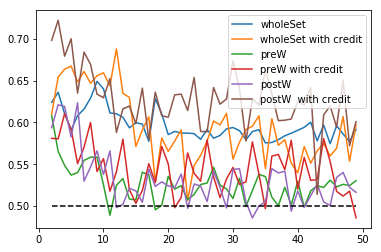

In [50]:
#basically cross validation to get optimal depth
realDeap = 50
testOF = pd.DataFrame(index=range(2, realDeap), columns=['wholeSet', 'wholeSet with credit', 'preW', 'preW with credit', 'postW', 'postW  with credit'])
for maxDeepth in range(2, realDeap):
    totalW = 0.0
    totalWC = 0.0
    totalPre = 0.0
    totalPreC = 0.0
    totalPos = 0.0
    totalPosC = 0.0
    for i in range(2, 6):
        _, _, auc = out_of_sample_forest(data, (1.0/i), maxDeepth)
        totalW += auc
        _, _, auc = out_of_sample_forest(data, (1.0/i), maxDeepth,  True)
        totalWC += auc

        _, _, auc = out_of_sample_forest(preW, (1.0/i), maxDeepth)
        totalPre += auc
        _, _, auc = out_of_sample_forest(preW, (1.0/i), maxDeepth, True)
        totalPreC += auc

        _, _, auc = out_of_sample_forest(postW, (1.0/i), maxDeepth)
        totalPos += auc

        _, _, auc = out_of_sample_forest(postW, (1.0/i), maxDeepth, True)
        totalPosC += auc

    testOF['wholeSet'][maxDeepth] = totalW/4
    testOF['wholeSet with credit'][maxDeepth] = totalWC/4
    testOF['preW'][maxDeepth] = totalPre/4
    testOF['preW with credit'][maxDeepth] = totalPreC/4

    testOF['postW'][maxDeepth] = totalPos/4
    testOF['postW  with credit'][maxDeepth]= totalPosC/4
                
plt.plot(range(2, realDeap), testOF)
plt.plot(range(2, realDeap), np.ones(realDeap - 2)*0.5, 'k--')
plt.legend(['wholeSet', 'wholeSet with credit', 'preW', 'preW with credit', 'postW', 'postW  with credit'])
    
#waht is this pattern? Seems forest already take care of some cross validation

In [51]:
import math
got = {}
for index, row in testOF[testOF==testOF.max(axis=0)].iterrows():
    for key in row.keys():
        if not math.isnan(row[key]):
            got[key] = index
got
    

{'postW': 6,
 'postW  with credit': 3,
 'preW': 2,
 'preW with credit': 4,
 'wholeSet': 9,
 'wholeSet with credit': 12}

415 0 14 0
false alarm: nan
missing target: 0.03263403263403263
auc: 0.672289156626506
171 0 8 0
false alarm: nan
missing target: 0.0446927374301676
auc: 0.6648391812865497
244 0 6 0
false alarm: nan
missing target: 0.024
auc: 0.7274590163934426


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


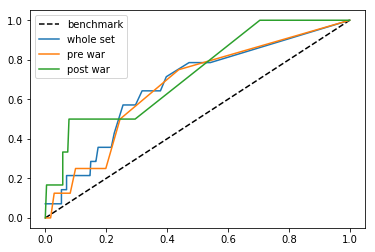

In [52]:
data_fpr, data_tpr, _ = out_of_sample_forest(data, 0.3, 10,  True, True)
preW_fpr, preW_tpr, _ = out_of_sample_forest(preW, 0.3, 2, True, pri=True)#a bit deeper
postW_fpr, postW_tpr, _ = out_of_sample_forest(postW, 0.3, 5, True, True)#max depth lower
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(data_fpr,data_tpr)
plt.plot(preW_fpr,preW_tpr)
plt.plot(postW_fpr,postW_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])

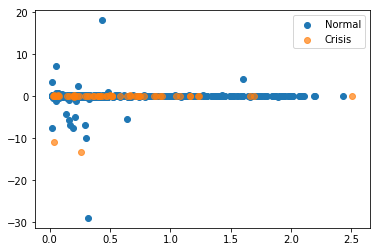

In [53]:
Crisis = data[data['crisisST'] == 1]
Normal = data[data['crisisST'] == 0]
#%matplotlib tk
plt.scatter(Normal['credit'], Normal['lag_2'])
plt.scatter(Crisis['credit'], Crisis['lag_2'], alpha = 0.7)
plt.legend(['Normal', 'Crisis'])
#based on this plot I dont think linear line will do well

1359 9 58 1
auc: 0.3312270789969273
false alarm: 0.9
missing target: 0.040931545518701484
1342 26 58 1
auc: 0.6492714837942314
false alarm: 0.9629629629629629
missing target: 0.041428571428571426
551 6 38 1
auc: 0.34880081020116926
false alarm: 0.8571428571428571
missing target: 0.06451612903225806
538 19 38 1
auc: 0.6490355844036275
false alarm: 0.95
missing target: 0.06597222222222222
811 0 20 0
auc: 0.694327990135635
false alarm: nan
missing target: 0.024067388688327317
810 1 19 1
auc: 0.6645499383477188
false alarm: 0.5
missing target: 0.022919179734620022


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


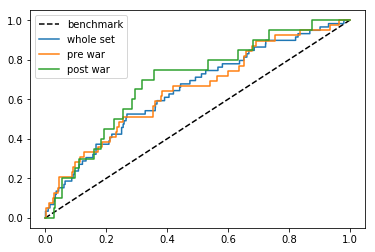

In [54]:
from sklearn.svm import SVC


def in_sample_SVM(training, kernel = 'sigmoid', credit=False):
    if credit is True:
        X = training[['lag_2', 'credit']]

    else:
         X = training[['lag_2']]
    y = training['crisisST']
    svmClas = SVC(kernel=kernel, probability=True)
    svmClas.fit(X, y)
    pre_pro = svmClas.predict_proba(X)[:, 1]
    fpr, tpr, thr = roc_curve(y, pre_pro, drop_intermediate=False)
    auc = roc_auc_score(y, pre_pro)
    
    prediction = svmClas.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, prediction).ravel()
    print(tn, fp, fn, tp)
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)

    print(f'auc: {auc}')
    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')
    
    return fpr, tpr, auc

in_sample_SVM(data)
data_fpr, data_tpr, _ = in_sample_SVM(data, credit=True)

in_sample_SVM(preW)
pre_fpr, pre_tpr, _ = in_sample_SVM(preW, credit=True)

post_fpr, post_tpr, _ = in_sample_SVM(postW)
in_sample_SVM(postW, credit=True)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(data_fpr,data_tpr)
plt.plot(pre_fpr,pre_tpr)
plt.plot(post_fpr,post_tpr)
plt.legend(['benchmark', 'whole set', 'pre war', 'post war'])

In [ ]:
#kernel : string, optional (default=’rbf’)
#‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
#degree : int, optional (default=3)
#study this sigmoid kernel and include in report

In [59]:
def out_of_sample_SVM(whole, test, kernel = 'sigmoid', credit=False):
    if credit is True:
        X = whole[['lag_2', 'credit']]
    else:
         X = whole[['lag_2']]
    y = whole['crisisST']
    
    trainSize = int(whole.shape[0]*(1-test))
    X_train = X[:trainSize]
    X_test = X[trainSize:]
    y_train = y[:trainSize]
    y_test = y[trainSize:]
    
    svmClas = SVC(kernel=kernel, probability=True)
    svmClas.fit(X_train, y_train)
    pre_pro = svmClas.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, pre_pro)
    auc = roc_auc_score(y_test, pre_pro)
    
    prediction = svmClas.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    false_alarm = fp/(1.0*tp + fp)
    missing_target = fn/(1.0*fn + tn)
    print(tn, fp, fn, tp)
    print(f'false alarm: {false_alarm}')
    print(f'missing target: {missing_target}')


    #print(auc)
    return fpr, tpr, auc

In [60]:
totalW = 0.0
totalWC = 0.0
totalPre = 0.0
totalPreC = 0.0
totalPos = 0.0
totalPosC = 0.0
for i in range(2, 6):
    _, _, auc = out_of_sample_SVM(data, (1.0/i))
    totalW += auc
    _, _, auc = out_of_sample_SVM(data, (1.0/i),  credit=True)
    totalWC += auc

    _, _, auc = out_of_sample_SVM(preW, (1.0/i))
    totalPre += auc
    _, _, auc = out_of_sample_SVM(preW, (1.0/i), credit=True)
    totalPreC += auc

    _, _, auc = out_of_sample_SVM(postW, (1.0/i))
    totalPos += auc

    _, _, auc = out_of_sample_SVM(postW, (1.0/i), credit=True)
    totalPosC += auc

print(f'whole set with lag2 loan only: {totalW/4}')
print(f'whole set with lag2 loan and lag1 credit to GDP: {totalWC/4}')
print(f'pre WW2 with lag2 loan only: {totalPre/4}')
print(f'pre WW2 with lag2 loan and lag2 credit to GDP: {totalPreC/4}')
print(f'post WW2 with lag2 loan only: {totalPos/4}')
print(f'post WW2 with lag2 loan and lag2 credit to GDP: {totalPosC/4}')

676 6 32 0
false alarm: 1.0
missing target: 0.04519774011299435
677 5 32 0
false alarm: 1.0
missing target: 0.045133991537376586
275 4 19 0
false alarm: 1.0
missing target: 0.06462585034013606
276 3 19 0
false alarm: 1.0
missing target: 0.06440677966101695
403 0 13 0
false alarm: nan
missing target: 0.03125
403 0 13 0
false alarm: nan
missing target: 0.03125
460 1 15 0
false alarm: 1.0
missing target: 0.031578947368421054
457 4 15 0
false alarm: 1.0
missing target: 0.03177966101694915
181 5 13 0
false alarm: 1.0
missing target: 0.06701030927835051
182 4 13 0
false alarm: 1.0
missing target: 0.06666666666666667
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368
270 0 7 0
false alarm: nan
missing target: 0.02527075812274368


/home/lin/.pyenv/versions/3.6.3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


344 0 13 0
false alarm: nan
missing target: 0.036414565826330535
340 4 13 0
false alarm: 1.0
missing target: 0.036827195467422094
139 3 7 0
false alarm: 1.0
missing target: 0.04794520547945205
140 2 7 0
false alarm: 1.0
missing target: 0.047619047619047616
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
202 0 6 0
false alarm: nan
missing target: 0.028846153846153848
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
275 0 11 0
false alarm: nan
missing target: 0.038461538461538464
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
112 1 7 0
false alarm: 1.0
missing target: 0.058823529411764705
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
162 0 5 0
false alarm: nan
missing target: 0.029940119760479042
whole set with lag2 loan only: 0.5783657089018523
whole set with lag2 loan and lag1 credit to GDP: 0.4795640725525544
pre WW2 with lag2 loan only: 0.46884108132319186
pre WW2 with lag2 loan and lag2 credit to GDP: 0.6667092503563